# Linear Neural Networks Training from scratch -Iris dataset
https://www.kaggle.com/datasets/arshid/iris-flower-dataset?resource=download&select=IRIS.csv

https://archive.ics.uci.edu/ml/datasets/iris

This exercise shows:  

1. How to build NN in a step-wise and explicit manner through training.  

2. Make NN code explainable and accessible to those who write in Python prior to the use of other frameworks (keras, FenserFlow, etc.)  


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets


In [12]:
from google.colab import drive
drive.mount('/content/drive')
# df = "https://datahub.io/machine-learning/iris/r/1.html"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
df= pd.read_csv('/content/drive/MyDrive/Data for DS/iris_csv.csv')
df

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [21]:
df.dtypes

sepallength    float64
sepalwidth     float64
petallength    float64
petalwidth     float64
class           object
dtype: object

#### Shuffling samples order to prevent bias

In [22]:
df = df.sample(frac=1).reset_index(drop=True)
df

,sepallength,sepalwidth,petallength,petalwidth,class
0,6.9,3.2,5.7,2.3,Iris-virginica
1,5.1,3.5,1.4,0.3,Iris-setosa
2,5.7,4.4,1.5,0.4,Iris-setosa
3,4.9,2.4,3.3,1.0,Iris-versicolor
4,4.7,3.2,1.6,0.2,Iris-setosa
...,...,...,...,...,...
145,5.8,4.0,1.2,0.2,Iris-setosa
146,5.0,3.0,1.6,0.2,Iris-setosa
147,4.8,3.4,1.6,0.2,Iris-setosa
148,5.8,2.7,4.1,1.0,Iris-versicolor


# Splitting the data into train and test

In [ ]:
ds_test = df.sample(frac=0.2, random_state=13).reset_index(drop=True)
ds_train = df.drop(ds_test.index)
ds_test

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.8,2.8,5.1,2.4,Iris-virginica
1,7.2,3.6,6.1,2.5,Iris-virginica
2,5.3,3.7,1.5,0.2,Iris-setosa
3,5.5,2.4,3.8,1.1,Iris-versicolor
4,4.8,3.0,1.4,0.3,Iris-setosa
5,5.7,4.4,1.5,0.4,Iris-setosa
6,5.0,2.3,3.3,1.0,Iris-versicolor
7,7.7,2.8,6.7,2.0,Iris-virginica
8,5.5,4.2,1.4,0.2,Iris-setosa
9,5.1,3.8,1.6,0.2,Iris-setosa


# coding (+1/-1) of 3 classes
To use labels as output we need to transform the nominal data y ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica')  from text to numeric.
To do so we first encode the classes and than transform into a 0,1 lists by OneHotEncoder  

In [ ]:
#change classes into numeric labels
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
ds_train['species'] = label_encoder.fit_transform(ds_train['species'])
ds_test['species'] = label_encoder.fit_transform(ds_test['species'])
ds_test

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.8,2.8,5.1,2.4,2
1,7.2,3.6,6.1,2.5,2
2,5.3,3.7,1.5,0.2,0
3,5.5,2.4,3.8,1.1,1
4,4.8,3.0,1.4,0.3,0
5,5.7,4.4,1.5,0.4,0
6,5.0,2.3,3.3,1.0,1
7,7.7,2.8,6.7,2.0,2
8,5.5,4.2,1.4,0.2,0
9,5.1,3.8,1.6,0.2,0


<!-- # ins=[]
# for i in range(1,40):
# #     print(meas[i])
#     temp=[(meas[i],),(meas[50+i],),(meas[100+i],)]
#     ins=[ins, temp]
# #     print(ins) -->


In [ ]:
integer_encoded = ds_train['species']
integer_encoded_test=ds_test['species']

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from numpy import argmax
# binary encode

onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = ds_train['species'].array.reshape(len(integer_encoded), 1)
desired_out  = onehot_encoder.fit_transform(integer_encoded)
print(desired_out)

onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded_test = ds_test['species'].array.reshape(len(integer_encoded_test), 1)
desired_out_test  = onehot_encoder.fit_transform(integer_encoded_test)
print(desired_out_test)


[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1.

In [ ]:
meas=ds_train[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
meast=ds_test[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

In [ ]:
desired_out = np.array(desired_out)
ins = np.array(meas)

desired_out_test = np.array(desired_out_test)
ins_t = np.array(meast)
print(ins_t)

[[5.8 2.8 5.1 2.4]
 [7.2 3.6 6.1 2.5]
 [5.3 3.7 1.5 0.2]
 [5.5 2.4 3.8 1.1]
 [4.8 3.  1.4 0.3]
 [5.7 4.4 1.5 0.4]
 [5.  2.3 3.3 1. ]
 [7.7 2.8 6.7 2. ]
 [5.5 4.2 1.4 0.2]
 [5.1 3.8 1.6 0.2]
 [5.4 3.  4.5 1.5]
 [6.3 2.5 4.9 1.5]
 [4.9 3.  1.4 0.2]
 [6.5 3.  5.8 2.2]
 [5.1 3.5 1.4 0.2]
 [6.8 3.2 5.9 2.3]
 [5.  3.  1.6 0.2]
 [6.1 2.9 4.7 1.4]
 [5.6 2.7 4.2 1.3]
 [5.5 2.3 4.  1.3]
 [6.3 3.4 5.6 2.4]
 [6.6 3.  4.4 1.4]
 [5.8 2.7 4.1 1. ]
 [5.  3.4 1.5 0.2]
 [5.2 3.5 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [4.6 3.1 1.5 0.2]
 [6.2 2.9 4.3 1.3]
 [6.7 3.3 5.7 2.1]
 [5.6 3.  4.1 1.3]]


## Feature vectors

n_input=4;%input('no of inputs');  
n_op=3;  
n_hid=4;%input('enter the no of hidden layer nodes');  
w_ih=rand(n_input,n_hid)  
w_bhid=rand(n_hid,1)  
w_ho=rand(n_hid,n_op)  
% w_bout=rand  
eta=1;  
n_pattern=3;  


In [ ]:
import random
n_input=4 #input('no of inputs');
n_op=3
n_hid=4 #input('enter the no of hidden layer nodes');
iteration=1000 ####note that I shoule use 10000 iterations
error= np.zeros((n_op,iteration))

In [ ]:
w_ih=np.random.random((n_input,n_hid)) #(4,4)
w_bhid=np.random.random((n_hid,1)) #(4,1)
w_ho=np.random.random((n_hid,n_op)) #(4,3)
#w_bout=rand
eta=1
n_pattern=3
w_ho

array([[0.58648078, 0.61909247, 0.14262351],
       [0.9885124 , 0.51366249, 0.9641456 ],
       [0.50465305, 0.58078003, 0.07855703],
       [0.76966733, 0.00132462, 0.38722668]])

# Training the model

In [ ]:
error=[]
for iters in range(0,iteration):
    for index in range(0,len(ins)):

        x=ins[index]#(4,)
        # op_w=in(:,j)'*w_ih;
        op_w=np.dot(np.transpose(x),w_ih)#(4,)
        # op_sig=1./(1+exp(-(op_w+w_bhid')))
        op_sig=1/(1+np.exp(-(op_w+np.transpose(w_bhid))))#(1, 4)
        # out=1./(1+exp(-(op_sig*w_ho)));
        out=1/(1+np.exp(-(np.dot(op_sig,w_ho))))#(1, 3)
        #e=desired_out(:,j)'-out;
        e=(np.transpose(desired_out[index]))-out #(1, 3)
        # delta=(out.*(1-out)).*e;
        delta=(((out*(1-out)))*e)#(1, 3)

#hidden layer weights updation
        #w_ho=w_ho+eta*op_sig'*delta;
        w_ho=w_ho+eta*(np.dot(np.transpose(op_sig),delta)) #(4, 3)

        # delta_hid=op_sig'.*(1-op_sig)'.*(w_ho*delta');
        delta_hid=(np.transpose(op_sig)*np.transpose(1-op_sig))*np.dot(w_ho,np.transpose(delta))#(4, 1)

#input layer weight updations
        # w_ih=w_ih+eta*(in(:,j)*delta_hid');
        w_ih=w_ih+eta*(np.multiply(x,np.transpose(delta_hid)))#(4,4)
        # w_bhid=w_bhid+2*delta_hid;
        w_bhid=w_bhid+(2*delta_hid) #(4, 1)

    error.append(e)
# print("op_sig "+str(op_sig),"op_w "+str(op_w),"w_bhid "+str(w_bhid),"w_ho "+str(w_ho))


# SSE- sum of squared error

![image.png](attachment:image.png)

            0
0    0.449636
1    0.340439
2    0.158385
3    0.113610
4    0.117051
..        ...
995  0.087170
996  0.087084
997  0.087108
998  0.087049
999  0.087060

[1000 rows x 1 columns]


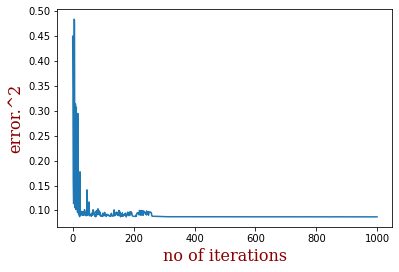

In [ ]:
#calculate and plot the results

sse=[]
for number in range(0,len(error)):
    s= ((error[number]) ** 2).sum()
    sse.append(s)
#     pd.DataFrame(np.array(sse))
sse=pd.DataFrame(sse)


font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
plt.plot(sse)
plt.xlabel('no of iterations',fontdict=font)
plt.ylabel('error.^2',fontdict=font)
print(sse)

# Testing the model

In [ ]:

outs = []
for inx in range(0,len(ins_t)):
    xs=ins_t[inx]#(4,)
    op_w=np.dot(np.transpose(xs),w_ih)#(4,)
    # op_sig=1./(1+exp(-(op_w+w_bhid')))
    op_sig=1/(1+np.exp(-(op_w+np.transpose(w_bhid))))#(1, 4)
    # out=1./(1+exp(-(op_sig*w_ho)));
    outs=1/(1+np.exp(-(np.dot(op_sig,w_ho))))#(1, 3)
#     es=(np.transpose(desired_out_test[inx]))-outs #(1, 3)
#     e=(np.transpose(desired_out_test[inx]))-outs
    print(np.round(outs),desired_out_test[inx])

[[0. 0. 1.]] [0. 0. 1.]
[[0. 0. 1.]] [0. 0. 1.]
[[1. 0. 0.]] [1. 0. 0.]
[[0. 0. 1.]] [0. 1. 0.]
[[1. 0. 0.]] [1. 0. 0.]
[[1. 0. 0.]] [1. 0. 0.]
[[1. 0. 0.]] [0. 1. 0.]
[[0. 0. 1.]] [0. 0. 1.]
[[1. 0. 0.]] [1. 0. 0.]
[[1. 0. 0.]] [1. 0. 0.]
[[0. 0. 1.]] [0. 1. 0.]
[[0. 0. 1.]] [0. 1. 0.]
[[1. 0. 0.]] [1. 0. 0.]
[[0. 0. 1.]] [0. 0. 1.]
[[1. 0. 0.]] [1. 0. 0.]
[[0. 0. 1.]] [0. 0. 1.]
[[1. 0. 0.]] [1. 0. 0.]
[[0. 0. 1.]] [0. 1. 0.]
[[0. 0. 1.]] [0. 1. 0.]
[[0. 0. 1.]] [0. 1. 0.]
[[0. 0. 1.]] [0. 0. 1.]
[[0. 0. 1.]] [0. 1. 0.]
[[0. 0. 1.]] [0. 1. 0.]
[[1. 0. 0.]] [1. 0. 0.]
[[1. 0. 0.]] [1. 0. 0.]
[[1. 0. 0.]] [1. 0. 0.]
[[1. 0. 0.]] [1. 0. 0.]
[[0. 0. 1.]] [0. 1. 0.]
[[0. 0. 1.]] [0. 0. 1.]
[[0. 0. 1.]] [0. 1. 0.]
